# Activation and Initialization of Convolution Neural Network


## Activation Function

### The meaning of the Activation Function

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    <b>Activation function</b> is a function that is added into an neural network  layer in order to help the network learn complex (non-linear) patterns in the data.<br>
<!--     https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253#:~:text=Simply%20put%2C%20an%20activation%20function,fired%20to%20the%20next%20neuron -->
For one layer neural network:
    $$ \hat{y} = f(W^TX), $$
    where<ul>
    <li>$f(\cdot)$ is the activation function - any arbitrary function (with non-linear behavior);
    <li>$\hat{y}$ is the network output;
        <li> $W,X$ are the weight and input.
    </ul>
    <u>The meaning of the activation function is to describe some non-linear relations for the input-output.</u><br>
<em>Note</em> <ul>
   <li> there are two popular activation functions:<ul>
       <li> <b>sigmoid/softmax</b> for output;
       <li> <b>ReLU family</b> (<u>including non-linear relu</u>) for intermediate (hidden) layers. 
   <li> Out-put without activation function is the so-called <b>Linear Activation</b>.
   <li> If you also have <b>Batch-Norm layers</b> in your network, that is added before the activation function making the order CNN-Batch Norm-Act. Although the order of Batch-Norm and Activation function is a topic of debate and some say that the order doesn’t matter.
       $$ \hat y = f(BN(W^TX)),$$
       where $BN$ is the Batch-Norm.
    
        

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
There are the following requirements for activation functions:<ul>
    <li> <b>Differentiable equation</b> - due to the method of training it is required for activation function to have certain derivative.        
    <li> <b>Low computation complexity</b>  - it is not the requirement, only recommendation due to reducing all network inference time.
    <ul> This includes:<ul> 
        <li><b>self-computation complexity </b>
        <li>and<b> sparsity potential</b> - a lot of zero values allow to use specific low-complexity algorithm for operations with matrix (see the pruning of neural networks). 
        </ul></ul>
    <li> <b>Low potential ability to gradient vanishing and explosion</b>. 
        <ul>Intuitively a lot of activation functions with saturation in the lowest and highest values lead to the problem of when the network stopping its training. It will be due to layers produce outputs of activation function in saturation ranges and error value will give zero gradient and not upgrade the values of the weights.</ul>
    <ul><em>Note</em><ul>
        <li> <u>Main reason of the <b>Gradient Vanishing</b> is the saturation of activation function derivative.</u><ul> 
        <li>When the derivative of activation function  is small or converge to 0 the learning is minimal (or stop for 0).<br> When slow learning occurs, the optimization algorithm that minimizes error can be attached to local minimum values and cannot provide maximum performance.<br></ul>
 <li> <u>Main reason of the <b>Gradient Explosion</b> is the lack of saturation of activation function (too high value of the activation function output).</u>
     <ul> In this case we will have too coarse search of minimum of loss, and will not obtain high accuracy. 
               </ul>  
<u>Essentially, <b>we want to have the function without of its value saturation, but with saturation of its derivative to 1, and with 0 only when it is necessary.</b></u> 

### Logistic Activation Function

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    <blockquote>
 <u>The meaning of the activation function lead analytical solution of the problem of non-linear regression</u>. <ul>
        <em>In particular</em>, in the case of <b>Logistic regression</b> the problem can be given as to find the best hyperplane (line in 2d) to divide to classes.<ul>
        In this problem we can write it as follows:
$$ y_i=f(\sum_{j=0}^M w_j x_{ij})=f(w^T x_{i}),$$
where: <ul>
        <li>$w$ is the weight vector,
        <li> $x_{j}={x_{0j},...,x_{ij},...,x_{Nj}}$ is the j-th input vector of length $N$ of the training data set with $M$ data; 
        <li>$y$ is the labels of classes in form $0$ and $1$ - thus we want make a decision by the rule 
            $$\begin{cases}
            y \ge 1/2 \to \text{class 1} \\
            y \le 1/2 \to \text{class 0}
            \end{cases}.$$  
        </ul>
        </ul>
       <ul> The simplest solution of this problem is the <b>step function (Heaviside function)</b>,
                    $$\rm {\bf step} = 
                    \begin{cases}
            y \ge 0 \to \text{class 1} \\
            y \le 0 \to \text{class 0}
            \end{cases}.$$ 
        <br> However, step function if not differential and can not be optimized analytically,
        moreover it has uncertainty value for inflection point $ y=0$</ul>
<u>The analytical solution of the Logistic regression problem is the <b>Maximization of Log-Likelihood function for binominal distribution (Bernoulli distribution)</b></u>
$$
\begin{aligned}
L(y|w^T x)=\prod_{i=1}^NP[y_i|w^T x_{i}]=\prod_{i=1}^N a_i^{y_i}(1-a_i)^{1-{y_i}}
\\
log(L(y|w^T x)) = \sum_{i=1}^N a_i^{y_i}+ \sum_{i=1}^N(1-a_i)^{1-{y_i}}\to max_w
\end{aligned}
$$
where $a=f[w^T x_{i}]$.  Thus,
        $$\frac{\partial log(L(y|w^T x))}{\partial w} \to 0  \implies \frac{\partial P[y_i|w^T x_{i}]}{\partial y}=P[y_i|w^T x_{i}](1-P[y_i|w^T x_{i}])\to 0
        $$ 
The corresponding  function to the expression  is  the <b>Sigmoid</b>:
$$
\begin{aligned}
&P[y_i|w^T x_{i}]=\sigma(w^T x)=P[y_i|w^T x_{i}]=\frac{1}{1+exp⁡{[−w^T x]} }, \\ 
&\frac{\partial\sigma(w^T x)}{\partial w}= \sigma(w^T x)(1-\sigma(w^T x))
\end{aligned}
$$
So we have solution that the activation function $f(\cdot)$ is the $sigmoid$ function.
<br>
<br>        
For the several classes the extension of the sigmoid is the <b>Softmax</b> activation function.<br>
By analogy with the above we have
$$
\begin{aligned}
&\text{For two classes}: \sigma(w^T x)\to P[y_i|w^T x_{i}]=\frac{P[y_i=1|w^T x_{i}]}{P[y_i=0|w^T x_{i}]+P[y_i=1|w^T x_{i}] }
\\\\
&\text{For several classes}: P[y_i|w^T x_{i}]=\frac{P[y_i=class_c|w^T x_{i}]}{\sum_{k=0}^{K-1}P[y_i=class_k|w^T x_{i}]} \to 
\\\\
&\to \textbf{softmax}=\frac{exp⁡{[w_c^T x]}}{\sum_{k=0}^{K-1}exp[w_k^T x]},
\end{aligned}
$$
where $c$ is the current class and $K$ is number of classes.<br>
$$
\frac{\partial(\text{softmax}(x))}{\partial x} = \text{softmax}(x)(1−\text{softmax}(x))
 $$
 </blockquote>
<br> Now we can imagine that the neural network is the multilayer combination of a set of logistic-like estimators. Thus we can propose that the analytical solution for us is the <b>sigmoid/softmax</b> function also.

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>Example of the decision plane made by  sigmoid (logistic regression)

> 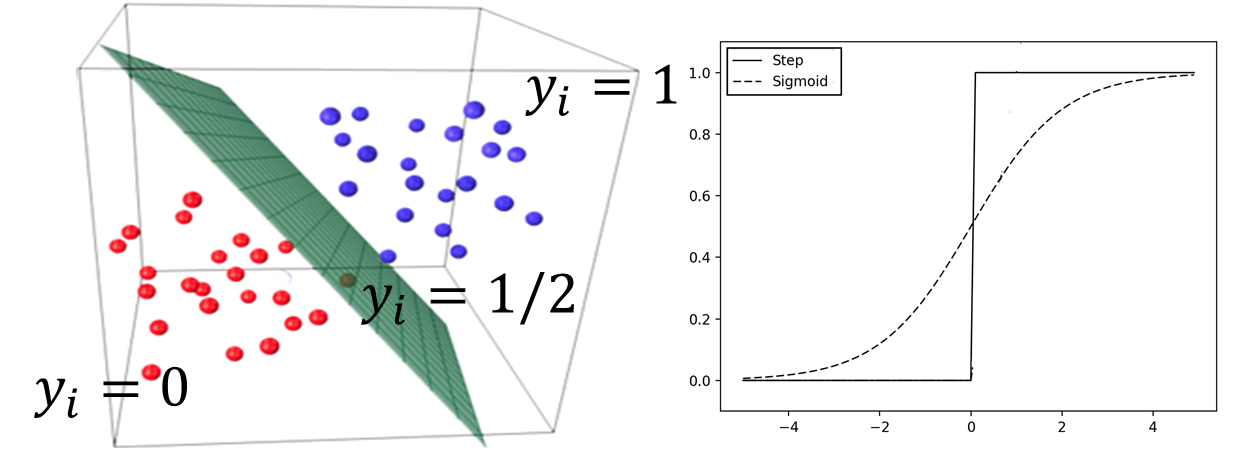

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    Let's rewrite <b>Sigmoid</b>
    $$ \mathrm{sigmoid}(x) = \frac{1}{1+exp⁡{(-x)} }, \ \ \ \text{sigmoid}'(x) = \text{sigmoid}(x)(1-\text{sigmoid}(x))$$
    and <b>Softmax</b>:
$$ \mathrm{softmax}(x_i) = \frac{exp⁡(x_i)}{\sum_j^K exp⁡(x_j)}, \ \ \ \text{softmax}'(x_i) = \text{softmax}(x_i)(1−\text{softmax}(x_i)) $$
 
    
 

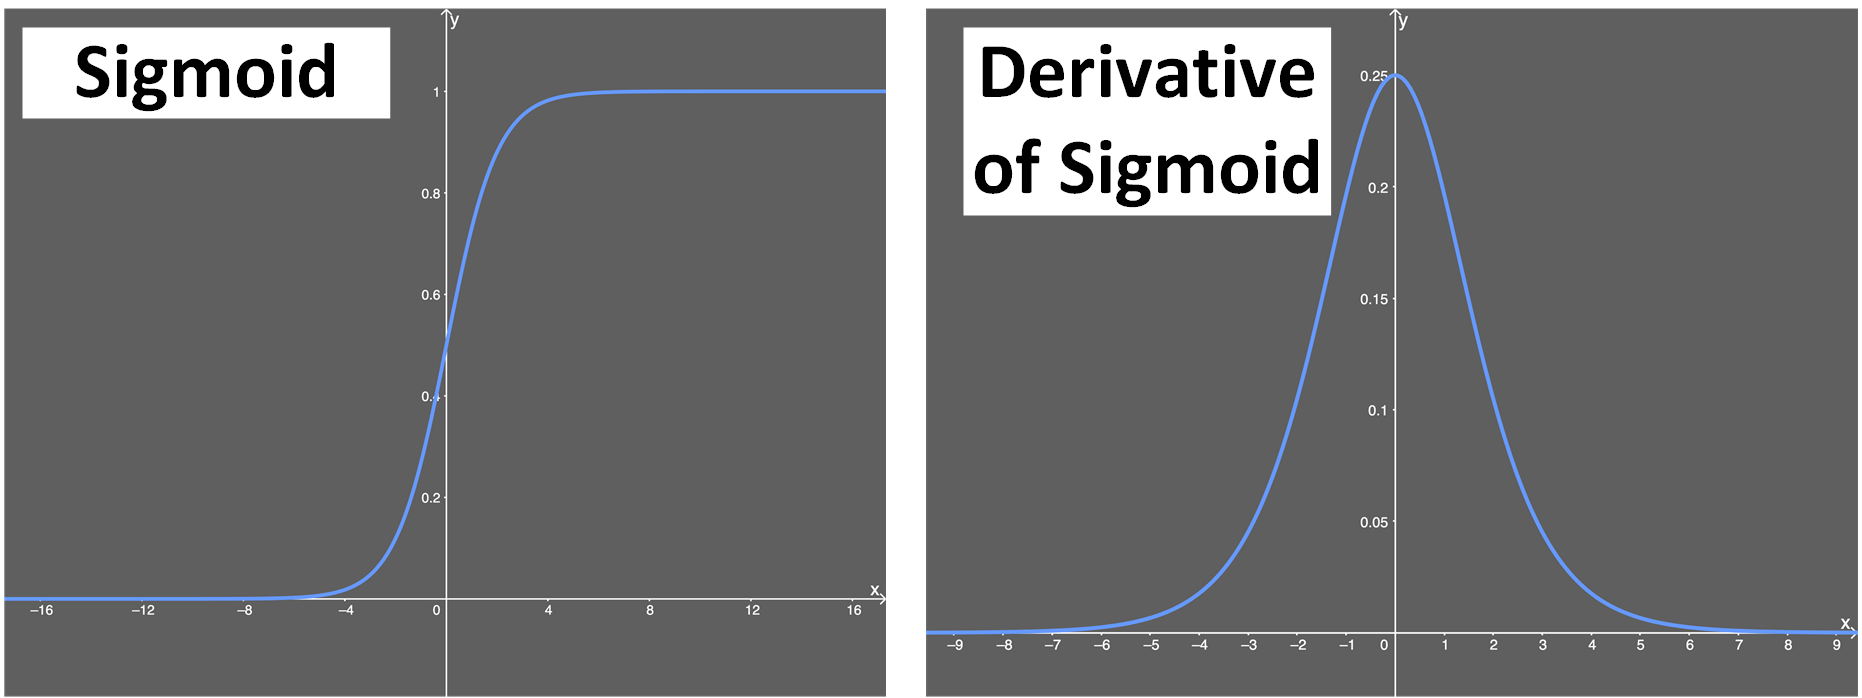

<!-- https://mlfromscratch.com/activation-functions-explained/#/  -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'><em>Note</em>
    The softmax allow to obtain probabilities of all classes (i.e. vector).
    <br> If you want to get one result you will need to take maximum of the softmax output.
    $$ \text{result} = \text{max}_i(\text{softmax}(x_i))$$

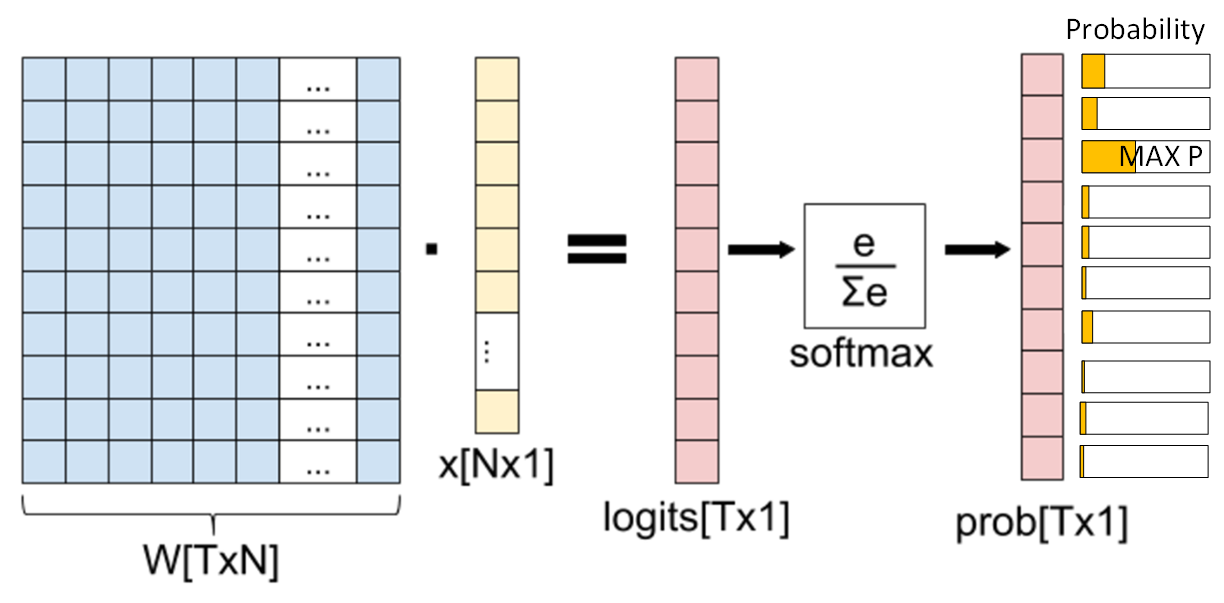


<!-- https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/ -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    <em>Note</em><ul>
    <li> you can replace the sigmoid with so-called <b>hard-sigmoid</b>, 
        $$ \text{hard-$\sigma$} = \text{ReLU}6(x+3)/6, $$
        <ul>where $\text{ReLU}6 = \min(6,\max(0,x))$.</ul>
<li>    If you need to have values below 0 you may use <b>tanh</b> instead of $sigmoid$:
    $$ \text{tanh}(x) = \frac{exp(x)+exp(-x)}{exp(x)-exp(-x)}, \ \ \ \text{tanh}'(x) = 1-\text{tanh}^2(x)$$
This function allows to have gradient below zero and do not better than sigmoid in any other case.<ul>
     Hyperbolic tangent can be learned a little slower because of its wide range of activating values.
<!--     https://towardsdatascience.com/comparison-of-activation-functions-for-deep-neural-networks-706ac4284c8a -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
<em>Actually, the sigmoid function have a several drawbacks.</em><ul>
The main problem with sigmoid is its saturation- i.e. vanishing of its derivative.<br>
But it is also problem with complexity in some cases.
 </ul>  
    <u>As a rule the sigmoid and softmax are used only in the last layer for make a decision in classification task.</u><ul>
    In other layers these functions can be replaced by its analogue.</ul>

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
The one of the solutions of the gradient vanishing/explosion problem is the<ul> 
<li><b>Gradient Clipping or Normalization</b>.
    <ul> Set some threshold values of the activation function output. For instance $[ 0.25,0.75]$ and clip or normalize all values exceeding that range.</ul>    
<li> <b>The other solution is to use activation functions without saturations.</b><ul>
    <li> The simples case is to use <b>softplus</b> function:
        $$\begin{aligned}
        &\text{softplus}(x)= log(1+exp(x)), \ \ \ \text{softplus}'(x)= \frac{1}{1+exp(-x)}\\ 
        &\text{or}
        \\
        &\text{shift_softplus}(x)= log(0.5+0.5exp(x)), \ \ \ \text{shift_softplus}'(x)= \frac{0.5}{1+exp(-x)} 
        \end{aligned}$$

 <li> the other empirical modification is <b>soft-sign</b> function
    $$ \text{softsign}(x) =  \frac{x}{1 + |x|}, \ \ \ \text{softsign}'(x)=\frac{1}{(1 + |x|)^{2}} $$
    
But these solution is not popular due to presence of all the drawbacks of sigmoid and in the case of softplus it also require addition operation of taking $log$ value; in the case of softsign it does not allow sparsity and regularization of negative gradient.
<!-- https://www.simonwenkel.com/2018/05/15/activation-functions-for-neural-networks.html -->

### Rectified Linear Unit (ReLU)

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'><ul>
<li> The one of common chose for overcome the sigmoid drawbacks is to use <b>Rectified Linear Unit (ReLU)</b>.
    $$ \text{ReLU}(x)=\text{max$(0,x)$}, \ \ \ \text{ReLU}'(x) =
    \begin{cases}
    \mbox{$1$} & \mbox{if } x > 0\\
    \mbox{$0$} & \mbox{if } x \leq 0
    \end{cases} $$
    Here we reduce the probability of the vanishing problem <u> for values above zero</u>.<ul>
    <li>ReLU provide <ul>
         <li> <u> low complexity</u> 
         <li> <u> high sparsity</u> ( a lot of zero values allow to use specific low-complexity algorithm for operations with matrix). 
         <li> ReLU is Scale-invariant: $\text{ReLU}(x)=\text{max$(0,ax)$}=a\text{max$(0,x)$}$. 
         <li> ReLU have some regularization effect due to restriction of negative values.  
         <li> Actually, having a value of 0 on the negative axis means that the network will run faster, <ul>however it also mean that we does not learn the weights here.   </ul>
         <li> However, <u>if too many values are below 0, We get</u> a bunch of weights and biases that is not updated, since the update is equal to zero. <ul>That can led to <u>the vanishing problem</u> again (so-called <b> dead relu problem)</b>.</ul>
    </ul>
 </ul>
    <li> <em><u> There are a lot of modifications of ReLU, including</u></em>:<ul>
<li> ReLU with saturation: <b>ReLU6</b>:
         $$ \text{ReLU6}(x)=\text{min(max$(0,x)$,6)}, \ \ \ \text{ReLU6'}(x)=\begin{cases}
    \mbox{$1$} & \mbox{if } x \in (0 , 6) \\
    \mbox{$0$} & \mbox{if } x \leq 0 \text{ and }x\geq 6
    \end{cases}. $$
 <u> This helps to stop blowing up the activation out growing, thereby stopping the gradients to explode(going to inf). </u>
<li> <b>Leaky ReLU</b>:
         $$ \text{LReLU}(x)=\begin{cases}
    \mbox{$x$} & \mbox{if } x > 0\\
    \mbox{$0.01x$} & \mbox{if } x \leq 0
    \end{cases} ,    
    \ \ \
    \text{LReLU}'(x) =
    \begin{cases}
    \mbox{$1$} & \mbox{if } x > 0\\
    \mbox{$0.01$} & \mbox{if } x \leq 0
    \end{cases}.
    $$  
 Leaky ReLU can be used with different coefficients for values below zero, but 0.01 is traditional value. 
<li> <b>Parametric ReLU</b>:
         $$ \text{PReLU}(x)=\begin{cases}
    \mbox{$x$} & \mbox{if } x > 0\\
    \mbox{$\alpha x$} & \mbox{if } x \leq 0
    \end{cases},  \ \ \    
    \text{PReLU}'(x) =
    \begin{cases}
    \mbox{$1$} & \mbox{if } x > 0\\
    \mbox{$\alpha$} & \mbox{if } x \leq 0
    \end{cases},
    $$
where $\alpha$ is the learnable-parameter, which can be set for each neuron. <ul>  
    for the case if $\alpha \le 1 \text{PReLU}(x)=\text{max$(ax,x)$}$.<br>
    If $\alpha=1$ we will have linear activation, thus <u> do not use $\alpha$ values near 1</u>.
    </ul> 
<u>Leaky ReLU and PReLU in differs with conventional relu allow to slightly learn negative values. But it cancel the sparsity effect. </u>
    <li> <b>Maxout</b>:<br>
    In essence, it is not the activation function, but from the other point of view it is the generalization of ReLU.
    $$  \text{maxout}(x)=\text{max$(xw_2+b_2, \ xw_1+b_1)$}, $$
   where $w_2, w_1, b_2, b_1$ are a several coefficients.<ul>
    <li>For the case $w_2=1, w_1=0, b_2=0, b_1=0$ we will have ReLU.
    <li>For the case $w_2=1, w_1=0, b_2=0.01, b_1=0$ we will have LReLU.
   <li> <b> Concatenated ReLU</b> 
       $$\text{CReLU} = concat(max(0,x),max(0,-x)) $$
The idea is to overcome the problem of relu by combining negative and positive relu together. 
      

 <!--   https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253#:~:text=Simply%20put%2C%20an%20activation%20function,fired%20to%20the%20next%20neuron -->
 <!-- https://mlfromscratch.com/activation-functions-explained/#/ -->
 <!-- https://towardsdatascience.com/comparison-of-activation-functions-for-deep-neural-networks-706ac4284c8a -->
 <!-- https://www.simonwenkel.com/2018/05/15/activation-functions-for-neural-networks.html/ 
<!-- https://www.programmersought.com/article/42532082794/ 
https://arxiv.org/pdf/1502.01852v1.pdf - PRELU,
https://books.google.ru/books?id=4sO4DwAAQBAJ&pg=PA13&lpg=PA13&dq=PRELU+learnable+algorithm&source=bl&ots=0lkx1Gncoq&sig=ACfU3U1rRqOD8YvpYLK5OBBxhcA80kBEoA&hl=en&sa=X&ved=2ahUKEwj37omT1fbwAhX17OAKHQI3CdwQ6AEwEHoECBQQAw#v=onepage&q=PRELU%20learnable%20algorithm&f=false-->
 

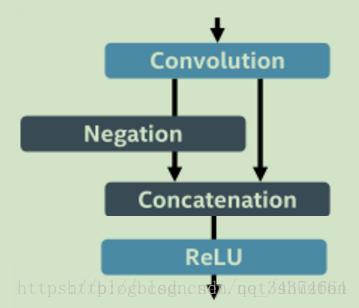

###   Non-Linear ReLU 

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'><ul>
<li> <b>Exponential Linear Unit, ELU</b>:   
$$
\text{ELU}(x) =
    \begin{cases}
    \mbox{$x$} & \mbox{if } x > 0\\
    \mbox{$\alpha (e^x-1)$} & \mbox{if } x < 0
    \end{cases},
    \ \ \
    \text{ELU}'(x) = 
    \begin{cases}
    \mbox{$1$} & \mbox{if } x > 0\\
    \mbox{$\alpha e^x$} & \mbox{if } x \leq 0
    \end{cases}
$$    
where $\alpha$ is the hyper-parameter.<br>
    <b> The features of non-linear RELU</b><ul>
<li>This function is allow to avoid the dead relu problem, while still keeping some of the computational speed gained by the ReLU activation function (sparsity of output).
<li>Also small values in the negative direction allow to correct vanishing problem in some cases.
<li>However, exponent here lead to increase the complexity.
<li>it is also bad to use $\alpha$ as hyper-parameter instead of learning it or determine by some recommendations.
    

 <!--   https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253#:~:text=Simply%20put%2C%20an%20activation%20function,fired%20to%20the%20next%20neuron -->
 <!-- https://mlfromscratch.com/activation-functions-explained/#/ -->

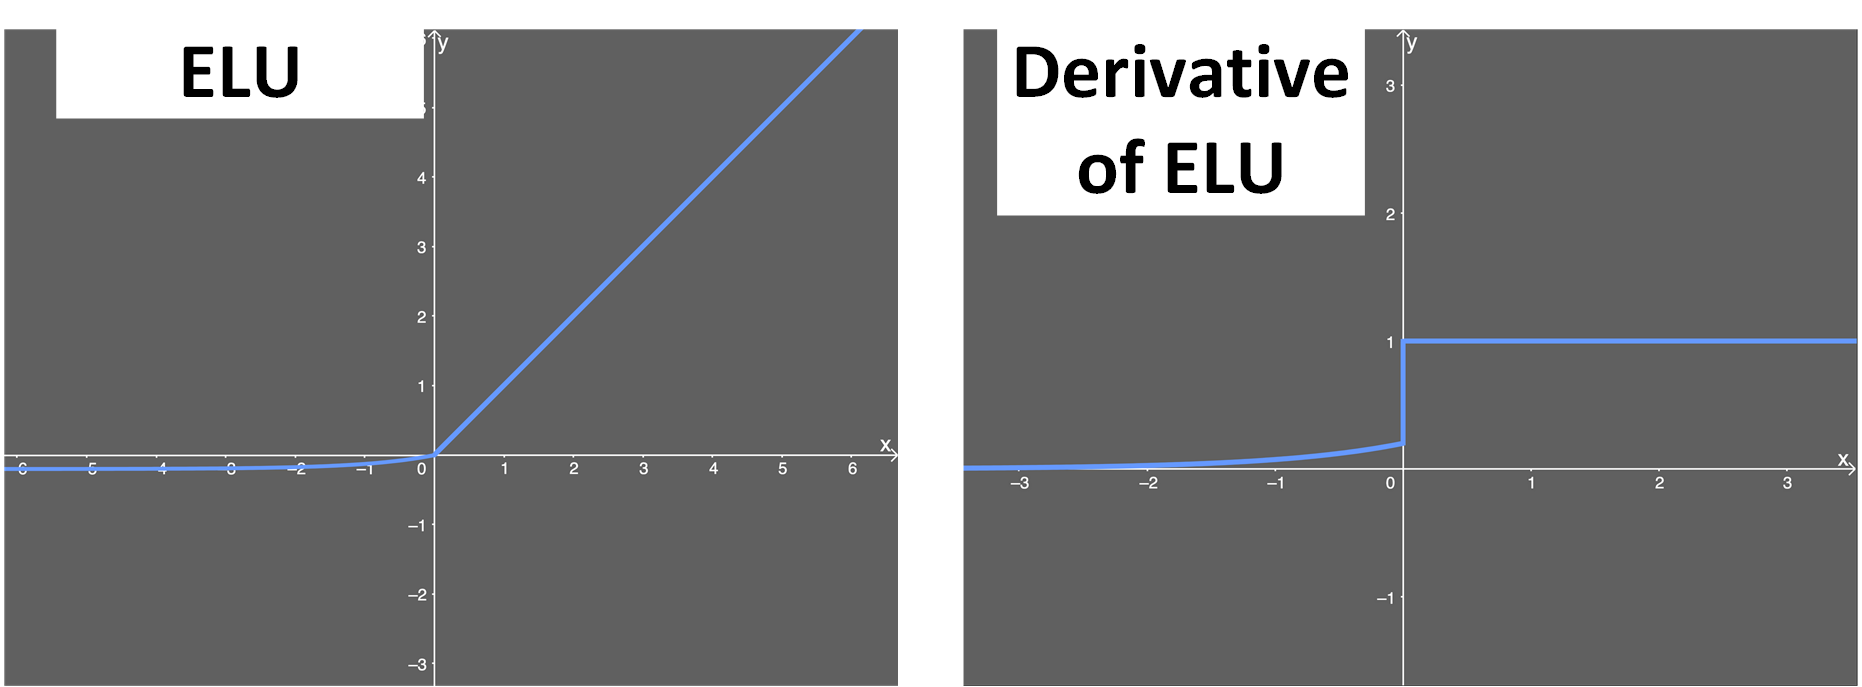

 <!--   https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253#:~:text=Simply%20put%2C%20an%20activation%20function,fired%20to%20the%20next%20neuron -->
 <!-- https://mlfromscratch.com/activation-functions-explained/#/ -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'><ul>
<li> <b>Scaled Exponential Linear Unit. SELU</b>:   
  $$\begin{aligned}  
\text{SELU}(x) = \lambda\cdot\text{ELU}(x)=\lambda
    \begin{cases}
    \mbox{$x$} & \mbox{if } x > 0\\
    \mbox{$\alpha e^x-\alpha$} & \mbox{if } x \leq 0
    \end{cases},
\ \ \
    \text{SELU}'(x) = \lambda
    \begin{cases}
    \mbox{$1$} & \mbox{if } x > 0\\
    \mbox{$\alpha e^x$} & \mbox{if } x \leq 0
    \end{cases}
  \end{aligned}   $$
 The authors are recommend to use:
 $$\begin{aligned}
 &a \approx 1.6732632423543772848170429916717 \\
 & \lambda \approx 1.0507009873554804934193349852946
 \end{aligned}
 $$
 It is shown that:<ul>
   <li>The output of a SELU is normalized to the normal distribution (potentially with zero mean value), which could be called <b>internal normalization</b>.
    <li> If all activation is SELU, then all network will be normalized (<b>external normalization</b>).    
  <li> <u>SELU Function has faster internal normalization then external, which means the network converges fast.</u>
<li>For SELU Variance of normalization decreases when the input is less than zero, and variance increases when the input is greater than zero.
<li>Vanishing and exploding gradient problem is impossible, (shown in the original paper).
    <li> SELU is similar to the idea and principles of self-normalizing neural networks
        <blockquote>
        <em>Note</em><ul>
            The SELU designed with for satisfy the following<ul>
       <li> normal distribution of activation function output,    
       <li> non-zero in the negative and positive values for controlling the mean, 
       <li> saturation regions (derivatives approaching zero) to dampen the variance if it is too large in the lower layer,
       <li> a slope larger than one to increase the variance if it would be too small in the lower layers, 
       <li> a continuous curve to ensures a fixed point, where variance damping is equalized by variance increasing.
        </ul></ul>
        </blockquote>
    </ul>
<em>Note</em>  When using this activation function in practice, one must use <b>lecun_normal</b> for weight initialization (with normal Gaussian distribution with std 1/n and mean 0,where n is the number of parameters in the layer), and if dropout wants to be applied, one should use <b>AlphaDropout</b>. 

 <!--   https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253#:~:text=Simply%20put%2C%20an%20activation%20function,fired%20to%20the%20next%20neuron -->
 <!-- https://mlfromscratch.com/activation-functions-explained/#/ -->

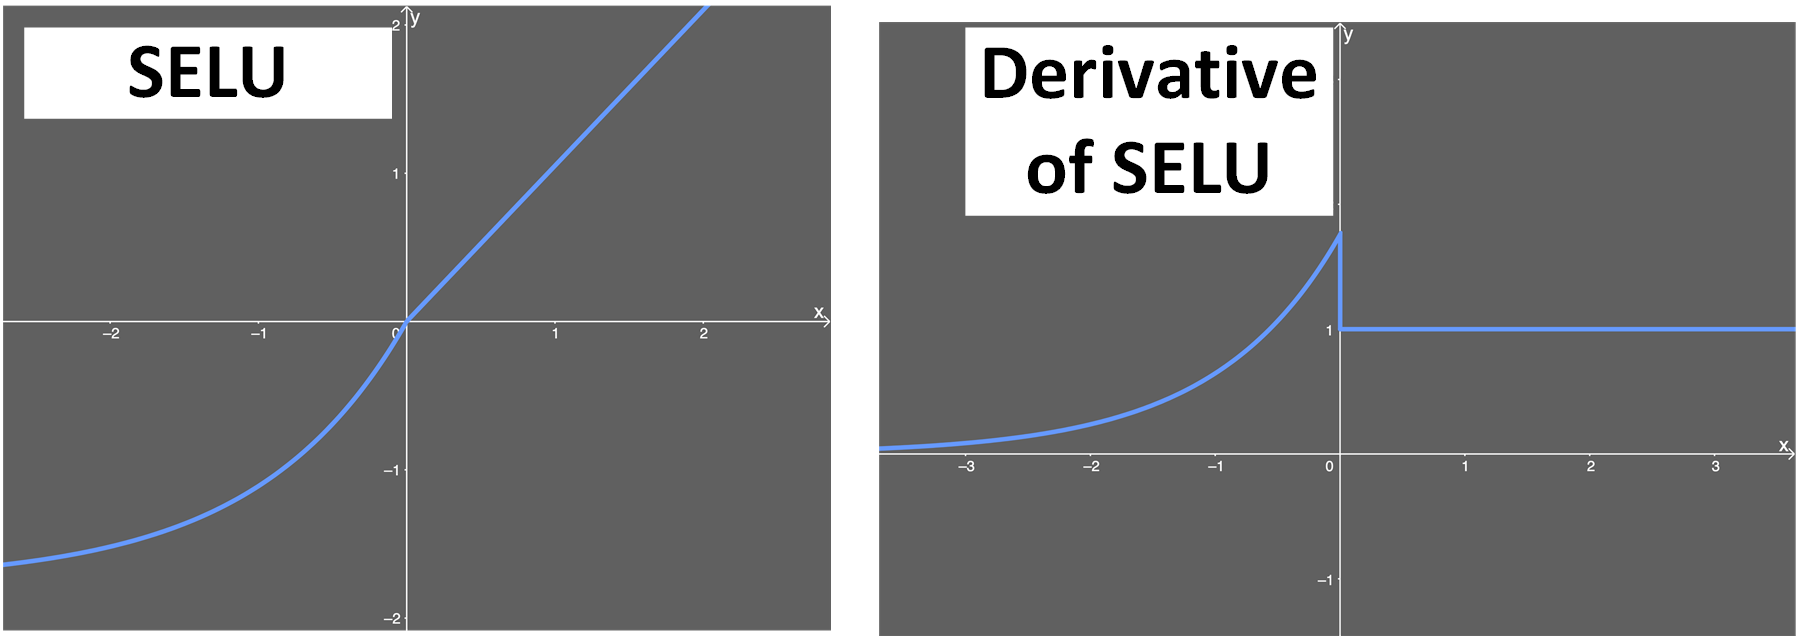

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'><ul>
<li> <b>Gaussian Exponential Linear Unit. GELU</b>:   
    $$ \text{GELU}(x) = 0.5x\left(1+\text{tanh}\left(\sqrt{2/\pi}(x+0.044715x^3)\right)\right) $$
    $$ \text{GELU}'(x) = 0.5\text{tanh}(0.0356774x^3 + 0.797885 x) + (0.0535161 x^3 + 0.398942 x) \text{sech}^2(0.0356774x^3+0.797885x)+0.5$$
 This type of activation functions is popular in such modern architectures as Transformer, GPT and so-on. This function allow to avoid the  vanishing problem. However function has high computation complexity and in CNN this chose is not popular. 
    
 <!--   https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253#:~:text=Simply%20put%2C%20an%20activation%20function,fired%20to%20the%20next%20neuron -->
 <!-- https://mlfromscratch.com/activation-functions-explained/#/ -->

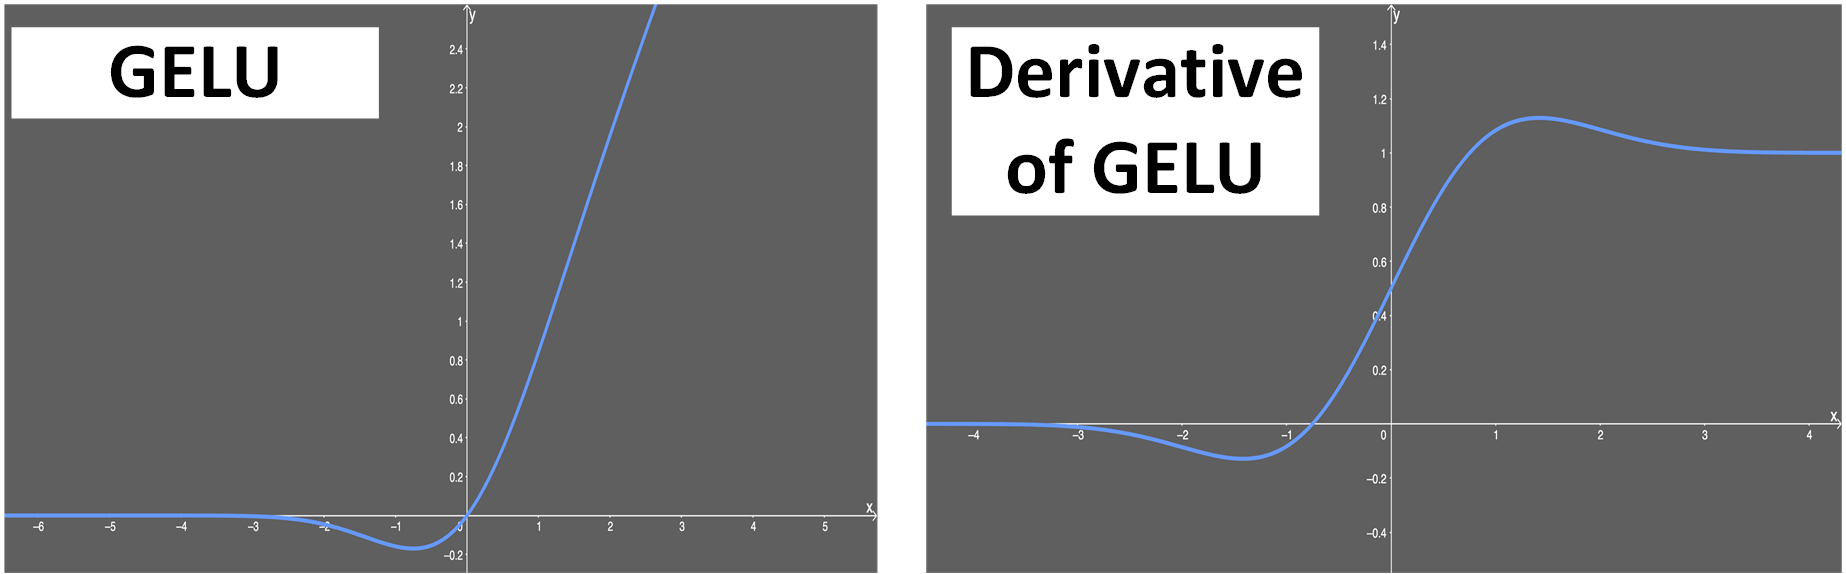

 <!--   https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253#:~:text=Simply%20put%2C%20an%20activation%20function,fired%20to%20the%20next%20neuron -->
 <!-- https://mlfromscratch.com/activation-functions-explained/#/ -->


<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'><ul>
<li> <b>Hard Swish, H-Swish</b> and <b>Swish</b>:   
        The other modern idea of some approximation of ReLU is  Swish function:
    $$ swish = x\cdot\text{sigmoid}(x), \ \ \ swish'=\sigma(x)+x\sigma(x)(1-\sigma(x))$$
    It could also be parametric swish with learnable parameter $\beta$:
    $$pswish(x)=x\cdot\text{sigmoid}(\beta x)$$
and Hard-Swish
$$ hswish = x\frac{\text{ReLU6}(x+3)}{6}, \ \ \ hswish' = \frac{\text{ReLU6}(x+3)}{6}+x \cdot \begin{cases}
    \mbox{$1$} & \mbox{if } x \in (0 , 6) \\
    \mbox{$0$} & \mbox{if } x \leq 0 \text{ and }x\geq 6
    \end{cases}. $$
it is almost similar to swish but it is less expensive computationally since it replaces sigmoid (exponential function) with a ReLU (linear type).
    <!-- https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253#:~:text=Simply%20put%2C%20an%20activation%20function,fired%20to%20the%20next%20neuron -->
    <!-- https://medium.com/techspace-usict/swish-a-self-gated-activation-function-3b7e551dacb5 -->

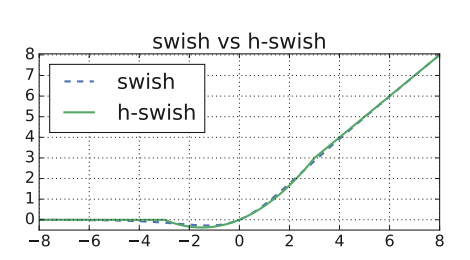

<!-- https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253#:~:text=Simply%20put%2C%20an%20activation%20function,fired%20to%20the%20next%20neuron -->


<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'><ul>
    The other modification of swish is the <b>mish</b>:
$$ \text{Mish}(x) = x \tanh(\ln(\mathrm{e}^x+1)) \ \ \
\text{Mish}'(x) = \tanh(\ln(\mathrm{e}^x+1))+\dfrac{x\mathrm{e}^x\operatorname{sech}^2(\ln(\mathrm{e}^x+1))}{\mathrm{e}^x+1}$$
<!--     https://www.simonwenkel.com/2018/05/15/activation-functions-for-neural-networks.html -->

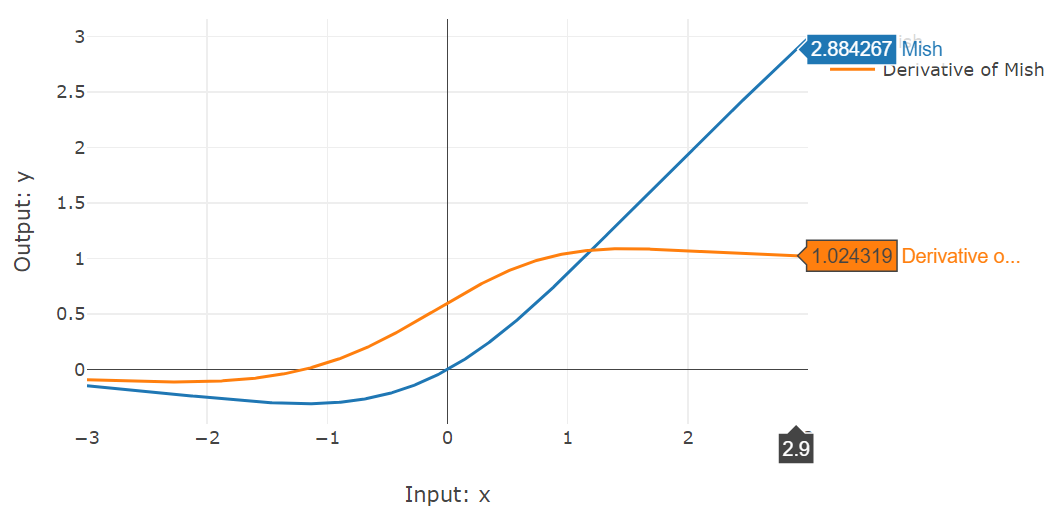
<!-- https://www.simonwenkel.com/2018/05/15/activation-functions-for-neural-networks.html/ -->

## Weights initialization

### Popular Initialization functions

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
 In the case if you have not pre-trained neural network it is necessary to initialize weights.<br>
There are following recommendation for weights initialization:<ul>
 <li> <u>Never initialize all the weights to zero or to the same value</u>.<ul>
     If all weights have the same values, in all subsequent iterations the weights are going to remain the same (they will move away from value but they will be equal), this symmetry will be hard to break during the training. Hence weights connected the same neuron should never be initialized to the same value. This kind of phenomenon is known as <b> symmetry breaking problem</b>.
</ul>
<!--      https://medium.datadriveninvestor.com/deep-learning-best-practices-activation-functions-weight-initialization-methods-part-1-c235ff976ed -->
 <li> <u>Use some random initializations (less then 1).</u><ul> 
<li> <u>using too small values or too high values lead to the gradient explosion and vanishing</u>. 
<li> it is need to note, that it is  bad to use values near $0.5$ for sigmoid and about $0$ for tanh due to the high probability of gradient vanishing.  
</ul>

<li> <b> Standard Normal initialization </b><ul>
    The initialization with same normal distribution with fixed deviation value:
 $$w_i \sim N\big[0,\sigma\big],\sigma\leq  1$$ 
    where $N = N(\mu,\sigma)$ is the normal distribution with mean value $\mu$ and variance  $\sigma$.
</ul>
<li> <b> Standard Uniform initialization </b><ul>
    The initialization with same uniform distribution with fixed deviation value:
 $$w_i \sim U\big[-\epsilon,\epsilon \big],\epsilon\leq 1$$ 
    where $U = U(-\epsilon,\epsilon)$ is the uniform distribution in the range from $-\epsilon$ to $\epsilon$.
</ul>    
 <li>  <b> Lecun Weights Initialization</b><ul> If variance or dispersion of values is predefined then with increasing the amount of values the dispersion of out put increase also, thus 
     <u>use dispersion value inversely to the amount of layer input and/or outputs or the amount of layer parameters</u>.<br>
  
The normal distribution with variance inver  $$\text{variance} = \sigma^2 = \frac{1}{n_i}, w_i \sim N\big[0,\frac{1}{\sqrt{n_i}} \big] $$ where $n_i$ is the number of layer inputs is the <b> Lecun Weights Initialization</b>.
<blockquote>    
     <em>Note</em><ul> The Lecun derivation is based in the idea, that
     $$ \begin{align}
&\text{Var}(s) = \text{Var}(\sum_i^n w_ix_i) 
= \sum_i^n \text{Var}(w_ix_i) \\\\
&= \sum_i^n [E(w_i)]^2\text{Var}(x_i) + [E(x_i)]^2\text{Var}(w_i) + \text{Var}(x_i)\text{Var}(w_i) \\\\
&= \sum_i^n \text{Var}(x_i)\text{Var}(w_i) = \left( n \text{Var}(w) \right) \text{Var}(x) \\\\
&\text{Thus, due to }\text{Var}(aX) = a^2\text{Var}(X),\text{ we need to have }a = \frac{1}{\sqrt{n}}
\end{align}$$
  </ul>   
<!-- https://cs231n.github.io/neural-networks-2/#batchnorm -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'><ul>
<li>    <b>Xavier Initialization</b> (or also <b>Glorot initialization</b>) <ul>
The method is based on the supposition that in the classification task the variance of each result should be 1 in average.<br> 
This case allow to avoiding gradient vanishing and explosion.<br>
For network it can be considering that the result of each layer is liner independent with other ones, 
due to this it is sufficient to corresponding each one layer differently, for whom the dispersion can be proposed to be geometric average of inputs and outputs  :<ul>
    <li> <b>Xavier uniform initialization</b>:       
$$w_i\sim U\big[-\frac{\sqrt{6}}{\sqrt{n_{i}+n_{i+1} }},\frac{\sqrt{6}}{\sqrt{n_{i}+n_{i+1} }}\big]$$
Where $U$ - is the uniform distribution, $w_i$ is the weights of $i$-th layer, $n_{i}$, $n_{i+1}$ are the number of inputs and outputs (inputs of the next layer).
    <li> <b>Xavier normal initialization</b>:    
$$w_i\sim N\big[0,\frac{\sqrt{2}}{\sqrt{n_{i}+n_{i+1} }}\big]$$
Where $N$ - is the normal distribution, $w_i$ is the weights of $i$-th layer, $n_{i}$, $n_{i+1}$ are the number of inputs and outputs.       
    <li><b>On the practice</b>:
    $$\begin{aligned}
&w_i\sim U\big[-\frac{2}{n_i} ,\frac{2}{n_i} \big], \text{   for Xavier uniform initialization} \\
\end{aligned}
$$ 
where $n_i$ - is the number of weights in layer.<br>

</ul>
<li><b>Xavier uniform initialization are recommended for sigmoid layer.</b><ul>
<li>    in some cases of <b>tanh layer</b> it is recommended to use $w_i\sim N\big[0,\frac{1}{{n_{i}}}\big]$
<!-- 
https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79
https://pouannes.github.io/blog/initialization/
https://www.deeplearning.ai/ai-notes/initialization/ -->

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'><ul>
<li>  <b>He Initialization</b> (or also Kaiming Initialization)<ul>
        The method is taking into account that <b>ReLU</b> has non-symmetric output.
        $$ 
        w_i\sim N\big[0 ,\frac{2}{n_i} \big]$$
The He method is most popular choose for ReLU and based on it functions.<br>
In some cases it is recommended to use for LRELU and PReLU
        $$ 
        w_i\sim N\big[0 ,\frac{2}{(1+\alpha^2)n_i} \big]$$,
        where $\alpha$ is 0.01 for LReLU and hyper parameters for PReLU.
</ul>

<li>  <b>Nguyen – Widrow Initialization </b> <ul>
    The idea is to chooses values in order to distribute the active region of each layer output approximately evenly across as the layer’s input space. 
    $$ w_i=\beta\frac{  w_i (RND)}{||w_i (RND))||_2} , \ \ \ \beta = 0.7 n_i^{1/M}, \ \ RND\sim U(−0.5,0.5) $$
where  $M$ is the number of layers; $||w_i (RND))||_2=\sqrt{\sum_j w_{ij}^2}$ .

        
<!-- https://medium.com/@gidim/part-2-selecting-the-right-weight-initialization-for-your-deep-neural-network-cc27cf2d5e56 -->
<!-- https://pouannes.github.io/blog/initialization/ -->

### Recommendations for using activation functions

<font size=4.5pt  face = 'georgia' style='Line-height :3'><div style='text-align: justify; padding:35px; margin-top:-35px; margin-bottom:-35px'>
    <b>  The main recommendations for using activation functions and weights initialization are</b>:<ul>
    <li> Start from ReLU for the hidden layers and softmax / sigmoid / linear for the output depends on the task:<ul>
        <li> for binary classification use sigmoid.
        <li> for multi-class classification use softmax (for mutually exclusive cases such as dog/cat/goose).
        <li> for multi-label binary classification use sigmoid (for mutually non-exclusive cases, such as dog or cat and seat or stay).   
        <li> for regression task use linear activation.
       </ul>
   <li> Leaky ReLU can be the first solution to the problem of the gradients' vanish.  
   <li> All hidden layers typically use the same activation function. 
   <li> Most common that output layer does not have an activation function if it is include in the loss function.      <li> use Xavier uniform initialization for sigmoid/softmax layers.
   <li> use He normal  initialization for ReLU layers.
    <li> use LeCun normal  initialization for SELU layers.        

<!--  https://towardsdatascience.com/everything-you-need-to-know-about-mobilenetv3-and-its-comparison-with-previous-versions-a5d5e5a6eeaa    -->
<!--        https://towardsdatascience.com/comparison-of-activation-functions-for-deep-neural-networks-706ac4284c8a -->
<!--         https://cs231n.github.io/neural-networks-1/ -->
       

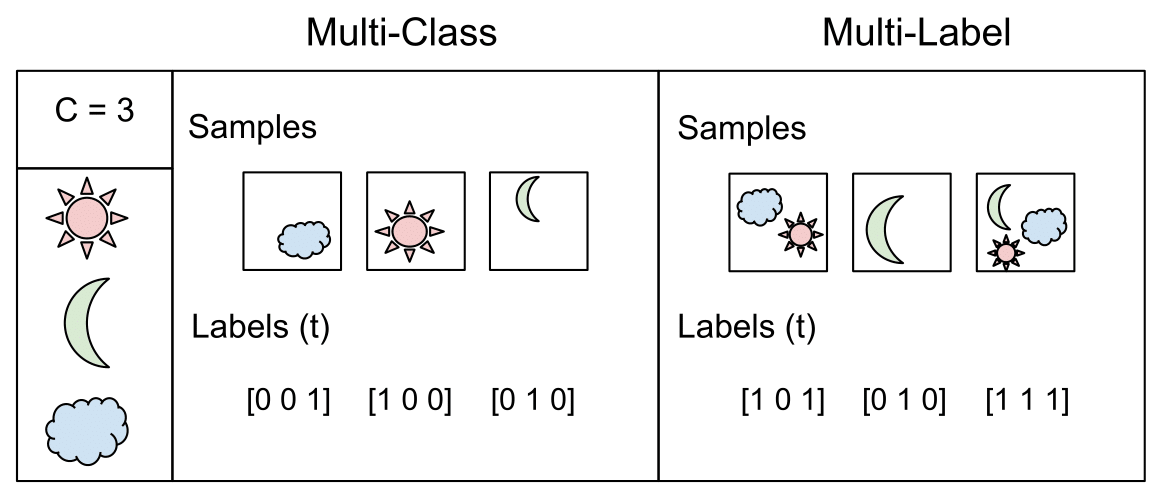

<!-- https://gombru.github.io/2018/05/23/cross_entropy_loss/ -->